## Read and Clean data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
names = [
    "Cathegorie",
    "P"
]
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "SubProduct Type",
    "region",
    "Where",
    "Additional Services",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "region": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "SubProduct Type": "SubType",
    "Where": "Location",
})

print(sales.columns)
sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["SubType"] = sales["SubType"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Services"] = sales["Additional Services"].astype("string")

sales.info()

Index(['Category', 'Id', 'Name', 'Type', 'SubType', 'Region', 'Location',
       'Additional Services', 'Price', 'Sales', 'Views', 'Quantity',
       'Sales Last Year', 'Views Last Year', 'Quantity Last Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Category             479 non-null    category
 1   Id                   479 non-null    int64   
 2   Name                 479 non-null    string  
 3   Type                 479 non-null    string  
 4   SubType              156 non-null    string  
 5   Region               242 non-null    string  
 6   Location             295 non-null    string  
 7   Additional Services  25 non-null     string  
 8   Price                479 non-null    float64 
 9   Sales                479 non-null    float64 
 10  Views                479 non-null    float64 


## Basic description

In [3]:
sales.describe(exclude=["int64", "string"])

,Category,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,479,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hélicoptère,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,NaN,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,NaN,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,NaN,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000


### Analyse Globale

### Price

In [4]:
print(f"- Prix moyen d'une prestation: {format(sales['Price'].mean(), '.2f')} euros")
print(f"- Prix le plus bas: {sales['Price'].min()} euros")
print(f"- Prix le plus haut: {sales['Price'].max()} euros")

- Prix moyen d'une prestation: 371.96 euros
- Prix le plus bas: 29.9 euros
- Prix le plus haut: 7531.9 euros


### Sales

In [12]:
last_year_sales = sales["Sales Last Year"].sum()
year_sales = sales["Sales"].sum()

print(f"- Total des ventes de l'anneée dernière: {format(last_year_sales, '.2f')} euros")
print(f"- Total des ventes de l'année: {format(year_sales, '.2f')} euros")
print(f'- {format(100 - last_year_sales * 100 / year_sales, ".2f")}% d\'évolution des ventes sur l\'année')

- Total des ventes de l'anneée dernière: 830169.25 euros
- Total des ventes de l'année: 1637209.30 euros
- 49.29% d'évolution des ventes sur l'année


### Views

##### Total

In [11]:
last_year_views = sales["Views Last Year"].sum()
year_views = sales["Views"].sum()

print(f"- Total de views de l'anneée dernière: {last_year_views}")
print(f"- Total des views de l'année: {format(year_views, '.2f')}")
print(f'- {format(100 - last_year_views * 100 / year_views, ".2f")}% d\'évolution des views sur l\'année')

- Total de views de l'anneée dernière: 290558.0
- Total des views de l'année: 302334.00
- 3.90% d'évolution des views sur l'année


Category
Astronaute                         0.00
Avion                          73772.90
Hélicoptère                   230993.12
Simulateur de vol               3379.95
ULM                            91299.87
avion de chasse                 8937.02
montgolfière                 1228826.44
montgolfière / ballon              0.00
simulateur de chute libre          0.00
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

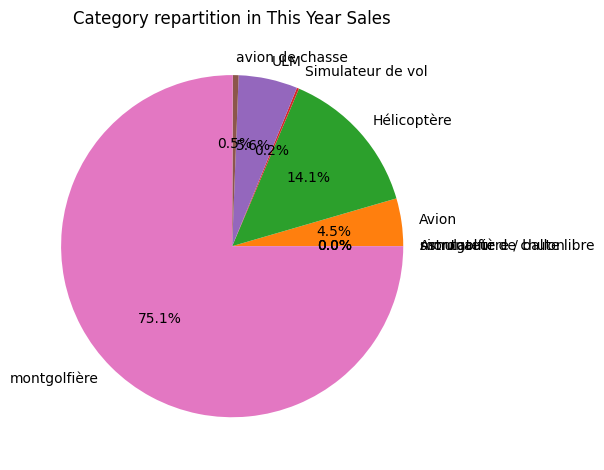

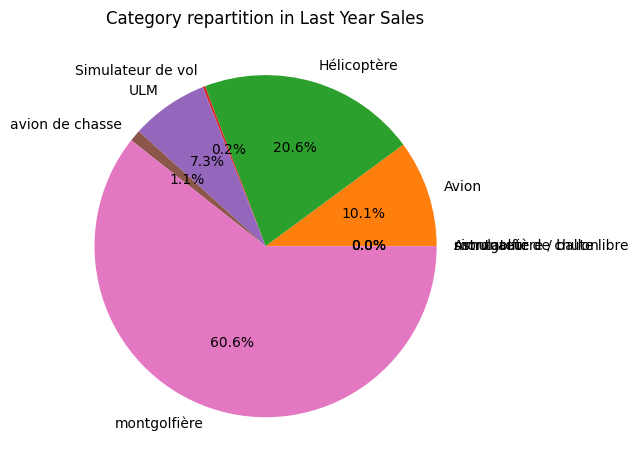

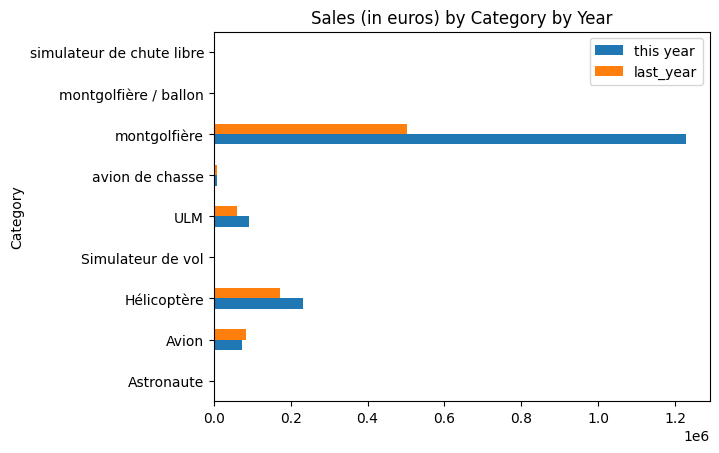

In [69]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category)
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")
fig.tight_layout()

fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")
fig.tight_layout()

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.set_title("Sales (in euros) by Category by Year")

Text(0.5, 1.0, 'Quantity sold by Category by Year')

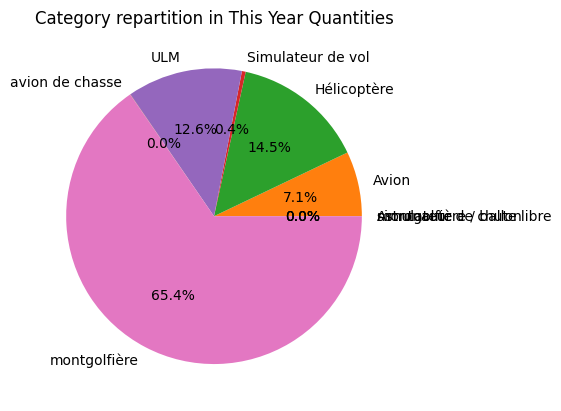

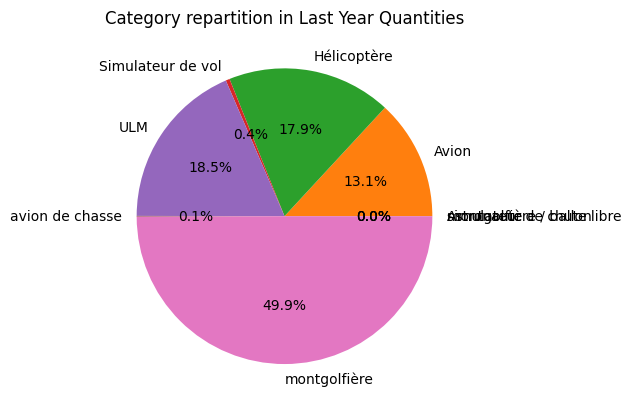

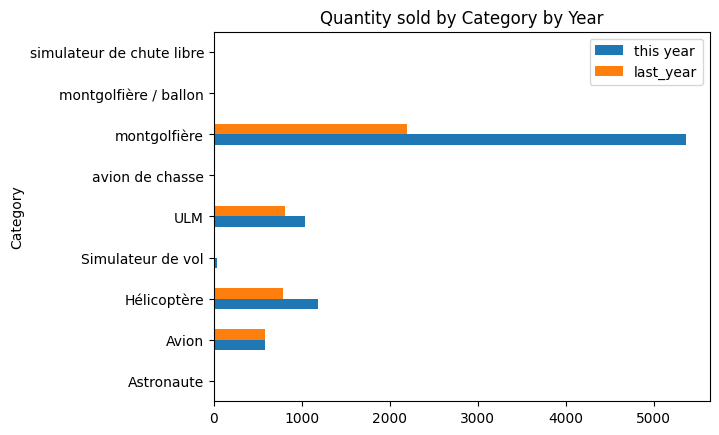

In [66]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.set_title("Quantity sold by Category by Year")

